# Twitter宠物狗评分数据清理与分析
## 收集

In [53]:
# 导入需要的库
import numpy as np
import pandas as pd
import bs4
import time
import requests
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
os.getcwd()

'/Users/Heihei/Udacity/data_mining/Project2/P2'

> 接下来载入需要的文件
1. `twitter_archive_enhanced.csv`：包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的。
2. `image-predictions.tsv`：其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. `tweet_json.txt`：额外的twitter信息。

In [55]:
df1 = pd.read_table('twitter_archive_enhanced.txt', sep = ',')

In [56]:
# 收集文件 2 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url) #用request库获取url 内容
with open(url.split('/')[-1], mode = 'wb') as file: 
    file.write(response.content)
df2 = pd.read_csv(url.split('/')[-1],sep = '\t')

In [57]:
# 收集文件 3 保存为 dataframe
df3 = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df3.columns = ['tweet_id', 'retweet_count', 'favorite_count']

In [58]:
df3.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 评估
### 目测评估

In [59]:
# 目测评估三个数据集
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [60]:
# 你需要添加更多的 code cell 和 markdown cell 来完成所有目测评估
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [61]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [62]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [63]:
df1['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [64]:
df1['expanded_urls'].isnull().sum()

59

In [65]:
df1[~df1['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

In [66]:
# 接下来看df1中我们关心的列是否一些缺失值
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [67]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Wikipedia关于Weratedogs中提到：
> WeRateDogs asks people to send photos of their dogs, then tweets selected photos rating and a humorous comment. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".  

因此，我把评分的分子标准定在0-20之间，排除那些高于20的数据。
>注意：尽管在Weratedogs的twitter中，很少有狗能达到15/10以上。但是，为了不错误排除有效数据，我还是将筛选标准设置在20以上。

In [141]:
#有上面数据可以知道，评分分子和分母有很多奇怪的地方。把这些奇怪的列选出，查看text原文
pd.set_option('max_colwidth',200)
df1.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


由上面的text可以知道，这些评分错误基本有以下几种情况：
- 分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10  
- 多只狗狗评的总分。规律是：分母是10的N倍，且分子可以被 N 整除。如144/120，121/110  
- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的。如
>After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
- 比较单独的错误，比如 24/7 指的是 7 天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 删除 掉；

In [69]:
df1['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Koda           6
Scout          6
Dave           6
Oscar          6
Leo            6
Jack           6
Rusty          6
Jax            6
Stanley        6
Bella          6
Milo           6
Sunny          5
            ... 
Ron            1
Arlo           1
Taco           1
Stark          1
Brady          1
Richie         1
Blakely        1
Dutch          1
Chubbs         1
Barclay        1
Sweets         1
Billl          1
Mitch          1
Burt           1
Lillie         1
Rudy           1
Cedrick        1
Vinscent       1
Godzilla       1
Shnuggles      1
Pete           1
Meatball       1
Brudge         1
Spencer        1
Gerbald        1
Torque         1
DonDon         1
Ester         

In [70]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [72]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [73]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [74]:
df1['tweet_id'].duplicated().sum()

0

In [75]:
df1['tweet_id'].isnull().sum()

0

In [76]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1810,832769181346996225,https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
247,670668383499735048,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,1,banana,0.107317,False,orange,0.099662,False,bagel,0.089033,False
1861,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.685084,True,Cardigan,0.314608,True,basenji,0.000160,True
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False


In [77]:
#接下来评估df2(图像预测数据)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
df2['jpg_url'].duplicated().sum()

66

In [79]:
# 对df3的数据进行分析
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### 质量
##### `df` 表格（将`dataframe_name1`修改为你的数据集名称，然后删掉括号内的提示）
- tweet_id、retweeted_status_user_id 应该是字符型，而不是数值型
- 转发、评论的twitter和无图片的twitter需要删除
- 删除评分不合理的行（分母不为10，分子大于20)，主要有以下几种：
>- 分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10  
>- 多只狗狗评的总分。规律是：分母是10的N倍，且分子可以被 N 整除。如144/120，121/110  
>- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的。如
>After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
>- 比较单独的错误，比如 24/7 指的是 7 天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 删除 掉；
- 狗的种类数据标签严重缺失
- 狗的名字有缺失值，并且有一些不是名字的值（如a,an,the等）
- timestamp,retweeted_status_timestamp这两列应该是datetime格式
- source列有额外的字符串

##### `dataframe_name2` 表格（将`dataframe_name2`修改为你的数据集名称，然后删掉括号内的提示）
- tweet_id应该是字符型，而不是整数型(int64)
- jpg_url列有66行重复数据


##### `dataframe_name3` 表格（将`dataframe_name3`修改为你的数据集名称，然后删掉括号内的提示）
- id列的名字应为tweet_id,以使其与前面两个表格一致；另外，id这列的格式应为字符

#### 整洁度
- df1中狗的地位（成长阶段）是分类数据，应该将4类合成一类
- 可以以tweeter ID为关键列，将三个表格的数据进行整合

## 清理

> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [172]:
# 备份三个数据集
#Copy (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)
main_clean = df1.copy()
image_clean = df2.copy()
retweet_clean = df3.copy()

## 1.质量问题

### 1.1 main_clean数据集

#### 1.1.1 tweet_id、retweeted_status_user_id 应该是字符型，而不是数值型

##### 定义
用str函数，将tweet_id、retweeted_status_id、retweeted_status_user_id、转换为字符型
##### 代码

In [173]:
main_clean['tweet_id'] = main_clean['tweet_id'].astype('str')
main_clean['retweeted_status_user_id'] = main_clean['retweeted_status_user_id'].astype('str')
main_clean['retweeted_status_id'] = main_clean['retweeted_status_id'].astype('str')

##### 测试

In [174]:
type(main_clean.tweet_id[0]),type(main_clean.retweeted_status_user_id[0]),type(main_clean.retweeted_status_id[0])


(str, str, str)

#### 1.1.2 删除转发的Twitter和无图片的twitter应该删除

##### 定义
删除retweeted_status_id这列中的181行非空缺数据；在后续整洁度整理方面，```merge```图片预测数据集时,直接用```inner```方式，可以将没有图片的数据删掉(因为没有图片就没有预测图片)。因此，此处暂不处理
##### 代码

In [175]:
#删除转发的推特
main_clean['retweeted_status_id'].value_counts()

nan                      2175
6.924173130233324e+17       1
7.867090828498289e+17       1
8.366481490034852e+17       1
8.47971000004354e+17        1
7.798343325968876e+17       1
7.69940425801171e+17        1
8.874739571039519e+17       1
7.392381577916948e+17       1
8.563301587682181e+17       1
6.820880793022136e+17       1
6.946697223784858e+17       1
8.395493263596708e+17       1
7.36392552031658e+17        1
8.650134204453683e+17       1
7.638375655647805e+17       1
6.671521640794235e+17       1
7.012147008817562e+17       1
7.916723228476375e+17       1
8.392899192982241e+17       1
6.742918370630533e+17       1
8.269586533285929e+17       1
7.33109485275861e+17        1
7.258422890467492e+17       1
6.800554559518843e+17       1
8.780576130401157e+17       1
6.732952685536051e+17       1
8.01167903437357e+17        1
6.790626142704681e+17       1
7.761133056561889e+17       1
                         ... 
7.838399664052306e+17       1
6.8731730631424e+17         1
6.98195409

In [176]:
# 删除retweeted_status_id这列中的181行非空缺数据
main_clean = main_clean[main_clean['retweeted_status_id'] == 'nan']

接下来删除评论的推特：

In [177]:
main_clean['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [178]:
main_clean = main_clean[main_clean['in_reply_to_status_id'].isnull()]

##### 测试

In [179]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null object
retweeted_status_user_id      2097 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(2), int64(2), objec

#### 1.1.3 删除评分不合理的行（分母不为10，分子大于20）

#### 问题
>- 分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10  
>- 多只狗狗评的总分。规律是：分母是10的N倍，且分子可以被 N 整除。如144/120，121/110  
>- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的。如
>After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
>- 比较单独的错误，比如 24/7 指的是 7 天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以删除掉（这些推文的特点是分母不是10的倍数）；

#### 定义
用正则表达式捕获```text```这列所有分母为10的倍数的评分(有些数字是浮点数），当评分有两个时，将最后一个评分作为最终评分（即用findall结果列表去-1位置的评分）。然后，用split方法，将评分的分子与分母分别划分到```rating_numerator```和```rating_denominator```这两列。最后，对分数进行标准化，将所有分子变为：分子/分母 *10 ；然后将所有分母变为10

##### 代码

In [180]:
#检查正则表达式是否匹配:如果匹配返回一个Match对象，如果不匹配，返回None
# ?:非捕获元；+匹配前面表达式一次或多次；\d匹配任意一个数字；.匹配除换行符\n外的任务单字符；\下一个字符为特殊字符
regular_test = re.match('((?:\d+\.)?\d+/[1-9]+[0]+)','11.26/10')
print(regular_test)

<_sre.SRE_Match object; span=(0, 8), match='11.26/10'>


In [181]:
main_clean['score'] = main_clean['text'].str.findall('((?:\d+\.)?\d+/[1-9]+[0]+)') #找出所有分数
main_clean['score'] = main_clean['score'].apply(lambda x: x[-1] if len(x)>0 else x)
rating = main_clean['score'].str.split('/',expand=True) #expand = True,将分为出来的内容全部单独成列
#以上split出来的结果是一个df,可以加列名，然后加入到主df
rating.columns = ['rating_numerator','rating_denominator']
main_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
main_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [182]:
#接下来进行标准化
main_clean['rating_numerator'] = main_clean['rating_numerator']/main_clean['rating_denominator']* 10
main_clean['rating_denominator'] = 10

In [183]:
main_clean['rating_numerator'].value_counts()

12.00      490
10.00      430
11.00      419
13.00      289
9.00       153
8.00       101
7.00        53
14.00       39
6.00        33
5.00        32
3.00        19
4.00        16
2.00        10
1.00         5
11.26        1
0.00         1
11.27        1
420.00       1
13.50        1
9.75         1
1776.00      1
Name: rating_numerator, dtype: int64

由上面数值可知，还是存在一些分子评分很奇怪，如：420，1776等，查看查看原因：

In [184]:
test = main_clean.query('rating_numerator == 420')
test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,nan,nan,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,None,None,None,None,420/10


In [185]:
test2 = main_clean.query('rating_numerator == 1776')
test2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,nan,nan,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None,1776/10


将这两行text中的twitter链接摘出，手动在浏览器打开查看。结果显示：420这行的图片是一个人，而1776这行是一只挂美国国旗的狗。这些数据属于特例，不是我们关注的内容，因此予以删除。

In [191]:
main_clean = main_clean.query('rating_numerator != 420 & rating_numerator != 1776')

##### 测试

In [192]:
main_clean['rating_numerator'].value_counts()

12.00    490
10.00    430
11.00    419
13.00    289
9.00     153
8.00     101
7.00      53
14.00     39
6.00      33
5.00      32
3.00      19
4.00      16
2.00      10
1.00       5
0.00       1
9.75       1
13.50      1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

In [193]:
main_clean['rating_denominator'].value_counts()

10    2095
Name: rating_denominator, dtype: int64

#### 1.1.4 狗的种类数据标签严重缺失
##### 定义
从原始text中查找狗的种类标签(doggo,floofer,pupper,puppo),然后将其填写到stage这一列中。
##### 代码

In [96]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2145 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2145 non-null object
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           2145 non-null object
retweeted_status_user_id      2145 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2145 non-null int64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
dtypes: float64(2), int64(2), obj

In [97]:
main_clean.shape

(2145, 17)

In [98]:
main_clean['doggo'].value_counts()

None     2058
doggo      87
Name: doggo, dtype: int64

In [99]:
main_clean['floofer'].value_counts()

None       2135
floofer      10
Name: floofer, dtype: int64

In [100]:
main_clean['pupper'].value_counts()

None      1912
pupper     233
Name: pupper, dtype: int64

In [101]:
main_clean['puppo'].value_counts()

None     2120
puppo      25
Name: puppo, dtype: int64

In [102]:
main_clean['stage']= main_clean['text'].str.lower().str.findall(r'(doggo|floofer|pupper|puppo)')
main_clean['stage'] = main_clean['stage'].apply(lambda x: ','.join(set(x)))#如果有多个查找结果，用“,”进行分类
main_clean['stage'] = main_clean['stage'].replace('',np.nan) #将缺失值换为np.nam

In [103]:
main_clean['stage'].value_counts()

pupper           241
doggo             81
puppo             31
doggo,pupper      10
floofer            9
puppo,doggo        2
floofer,doggo      1
Name: stage, dtype: int64

In [104]:
main_clean.drop(['pupper','doggo','puppo','floofer'], axis = 1, inplace=True)

##### 测试

In [105]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2145 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2145 non-null object
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           2145 non-null object
retweeted_status_user_id      2145 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2145 non-null int64
rating_denominator            2145 non-null int64
name                          2145 non-null object
stage                         375 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 251.4+ KB


#### 1.1.5 狗的名字有缺失值，并且有一些不是名字的值（如a,an,the等）
##### 定义
将缺失值，不属于名字的值(a,an,the等，基本为小写字母）改为np.nan
##### 代码

In [106]:
main_clean['name'].value_counts()

None            659
a                54
Lucy             11
Charlie          11
Cooper           10
Oliver           10
Penny             9
Tucker            9
Lola              8
Winston           8
the               8
Sadie             8
Daisy             7
Toby              7
Oscar             6
Stanley           6
Jax               6
Bella             6
Koda              6
Bailey            6
Bo                6
Dave              5
Buddy             5
an                5
Milo              5
Bentley           5
Chester           5
Rusty             5
Scout             5
Louis             5
               ... 
Kloey             1
Charleson         1
Klein             1
Ron               1
Ester             1
DonDon            1
Torque            1
Gerbald           1
Betty             1
Bradley           1
Wesley            1
Dante             1
Biden             1
Cleopatricia      1
Barclay           1
Sweets            1
Billl             1
Mitch             1
Katie             1


由上面结果可知，缺失数据都标记为“None”,另外还有an,a,the等明显不是名字的字符

In [199]:
# 替换
mask = (main_clean.name.str.islower()) | (main_clean.name == 'None')
main_clean.loc[mask,'name'] = np.nan

##### 测试

In [200]:
main_clean['name'].value_counts()

Lucy            11
Charlie         11
Oliver          10
Cooper          10
Penny            9
Tucker           9
Sadie            8
Lola             8
Winston          8
Toby             7
Daisy            7
Stanley          6
Bo               6
Bella            6
Oscar            6
Jax              6
Bailey           6
Koda             6
Dave             5
Buddy            5
Louis            5
Milo             5
Bentley          5
Leo              5
Chester          5
Rusty            5
Scout            5
Brody            4
Boomer           4
Finn             4
                ..
Danny            1
Lupe             1
DayZ             1
Kloey            1
Torque           1
Shnuggles        1
Frönq            1
Brudge           1
Iggy             1
Edmund           1
Betty            1
Bradley          1
Wesley           1
Dante            1
Biden            1
Cleopatricia     1
Barclay          1
Sweets           1
Billl            1
Mitch            1
Burt             1
Rover       

#### 1.1.6 timestamp,retweeted_status_timestamp这两列应该是datetime格式
##### 定义
将timestamp,retweeted_status_timestamp改为datetime格式
##### 代码

In [201]:
main_clean['timestamp'] = pd.to_datetime(main_clean['timestamp'])
main_clean['retweeted_status_timestamp'] = pd.to_datetime(main_clean['retweeted_status_timestamp'])

##### 测试

In [202]:
main_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                     float64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
score                                 object
dtype: object

#### 1.1.7 source列有额外的字符串
##### 定义
使用正则表达式，把source中的来源提取出来
##### 代码

In [203]:
#查看有哪些值
main_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1963
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [204]:
#用正则表达式提取source内容
main_clean['source'] = main_clean['source'].str.extract(r'>(.*)<',re.S,expand=True)

##### 测试

In [205]:
main_clean['source'].value_counts()

Twitter for iPhone     1963
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### 1.2 image_clean 数据集

#### 1.2.1 tweet_id 应该是字符型，而不是整数型(int64)
##### 定义
用astype将整数型转换为字符型
##### 代码

In [206]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')

##### 测试

In [207]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [208]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True


#### 1.2.2 jpg_url列有66行重复数据
##### 定义
用drop_duplicated函数，将重复数据删除
##### 代码

In [209]:
image_clean['jpg_url'].duplicated().sum()

66

In [210]:
image_clean['jpg_url'].drop_duplicates(inplace=True)

##### 测试

In [211]:
image_clean['jpg_url'].duplicated().sum()

0

### 1.3 retweet_clean 数据

#### id的名字应为tweet_id,与前面两个表格一致；另外id这列的格式应为字符
##### 代码

In [212]:
retweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [214]:
retweet_clean['tweet_id'] = retweet_clean['tweet_id'].astype('str')

##### 测试

In [215]:
retweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## 2.整洁度问题

#### 2.1 第一个数据集(main_clean)中狗的地位(doggo等)有四列

该问题已在 "1.1.4 狗的种类数据标签严重缺失" 更改


#### 2.2 将三个数据集合并为一个

In [216]:
retweet_clean.rename(columns = {'id':'tweet_id'},inplace=True)
#用inner方法直接将无图片的推特删除
df_clean_1 = pd.merge(main_clean, image_clean, on='tweet_id',how='inner') 
df_clean = pd.merge(df_clean_1, retweet_clean, on='tweet_id')

In [217]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 31 columns):
tweet_id                      1969 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source                        1969 non-null object
text                          1969 non-null object
retweeted_status_id           1969 non-null object
retweeted_status_user_id      1969 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1969 non-null object
rating_numerator              1968 non-null float64
rating_denominator            1969 non-null int64
name                          1348 non-null object
doggo                         1969 non-null object
floofer                       1969 non-null object
pupper                        1969 non-null object
puppo                         1969 non-null object
score            

In [218]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1344,681231109724700672,NaN,NaN,2015-12-27 21:52:07,Twitter for iPhone,I just love this pic. 11/10 this pupper is going places https://t.co/P16uhh1PbI,nan,nan,NaT,https://twitter.com/dog_rates/status/681231109724700672/photo/1,...,0.406047,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True,539,2616
791,740699697422163968,NaN,NaN,2016-06-09 00:19:04,Twitter for iPhone,This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,nan,nan,NaT,https://twitter.com/dog_rates/status/740699697422163968/photo/1,...,0.878863,False,swing,0.024535,False,barrow,0.019577,False,884,3088
420,801167903437357056,NaN,NaN,2016-11-22 20:58:07,Twitter for iPhone,This is Milo. I would do terrible things for Milo. 13/10 https://t.co/R6wJyC2Tey,nan,nan,NaT,https://twitter.com/dog_rates/status/801167903437357056/photo/1,...,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True,6925,27290
54,880221127280381952,NaN,NaN,2017-06-29 00:27:25,Twitter for iPhone,Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK,nan,nan,NaT,"https://twitter.com/dog_rates/status/880221127280381952/photo/1,https://twitter.com/dog_rates/status/880221127280381952/photo/1",...,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True,4398,27561
1024,705975130514706432,NaN,NaN,2016-03-05 04:36:02,Twitter for iPhone,This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper https://t.co/cfn81n3FLO,nan,nan,NaT,"https://twitter.com/dog_rates/status/705975130514706432/photo/1,https://twitter.com/dog_rates/status/705975130514706432/photo/1",...,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True,838,3386


##### in_reply_to_status_id,in_reply_to_user_id 不是我们关注的数据，且有较多缺失值，予以删除

In [219]:
df_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [220]:
df_clean.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1704,670807719151067136,2015-11-29 03:33:17,Twitter for iPhone,"Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents https://t.co/idzH8JH06g",nan,nan,NaT,"https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1",11.0,10,...,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True,538,1225
213,838921590096166913,2017-03-07 01:17:48,Twitter for iPhone,This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze https://t.co/oXVu9pNZZv,nan,nan,NaT,https://twitter.com/dog_rates/status/838921590096166913/photo/1,13.0,10,...,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True,2341,12135
361,813217897535406080,2016-12-26 03:00:30,Twitter for iPhone,Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81,nan,nan,NaT,"https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,http...",13.0,10,...,0.905972,True,Pomeranian,0.048038,True,West_Highland_white_terrier,0.035667,True,8436,20708


### 存储清理后的主数据集

In [221]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_clean.to_csv('clean.csv')

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


In [222]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'score', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### 相关问题
1）哪个品种的狗最受欢迎（评分最高）（箱型图）  
2）点赞数、转发数与评分是否相关？  
3）哪只狗有最高的点赞数？哪只狗有最高的转发数？

#### 1.哪10个品种的狗最受欢迎？

##### 根据预测的狗的种类（p1_dog)，呈现各个种类狗的打分

In [225]:
#自定义一个获取狗种类的函数
def get_breed(item):
    if item['p1_dog'] == True:
        item['category'] = item['p1']
    elif item['p2_dog'] == True:
        item['category'] = item['p2']
    elif item['p3_dog'] == True:
        item['category'] = item['p3']
    else:
        item['category'] = np.nan
    return item

In [226]:
# 把狗的预测种类数据放在category这列
df_clean = df_clean.apply(get_breed,axis=1)

In [227]:
#删除掉没有种类预测的行
category_clean = df_clean[df_clean['category'].notnull()]

In [228]:
#注意：取出评分均值在前10名的数据
category10 = category_clean.groupby('category')['rating_numerator'].mean().sort_values(ascending=False).head(10)

In [229]:
category10.index

Index(['Bouvier_des_Flandres', 'Saluki', 'briard', 'Tibetan_mastiff',
       'Border_terrier', 'standard_schnauzer', 'silky_terrier',
       'Gordon_setter', 'Irish_setter', 'Samoyed'],
      dtype='object', name='category')

In [233]:
#注意：在清理好的数据集category_clean中筛选出目标种类狗的数据
category_10 = pd.DataFrame(columns = category_clean.columns)
for dog in category10.index:
    target_dog_data = category_clean[category_clean['category']== dog]
    category_10 = pd.concat([category_10,target_dog_data],ignore_index=True)
category_10.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,category
21,820314633777061888,2017-01-14 17:00:24,Twitter for iPhone,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,nan,nan,NaT,"https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog...",14.0,10,...,True,black-and-tan_coonhound,0.042041,True,Rottweiler,0.009417,True,646,3696,Gordon_setter
4,750056684286914561,2016-07-04 20:00:23,TweetDeck,This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,nan,nan,NaT,https://twitter.com/dog_rates/status/750056684286914561/photo/1,11.0,10,...,True,borzoi,0.263550,True,Labrador_retriever,0.077004,True,1006,3429,Saluki
8,815966073409433600,2017-01-02 17:00:46,Twitter for iPhone,Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k,nan,nan,NaT,https://twitter.com/dog_rates/status/815966073409433600/video/1,13.0,10,...,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,9846,24964,Tibetan_mastiff
0,861288531465048066,2017-05-07 18:36:02,Twitter for iPhone,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,nan,nan,NaT,https://twitter.com/dog_rates/status/861288531465048066/video/1,13.0,10,...,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,4465,17961,Bouvier_des_Flandres
3,817120970343411712,2017-01-05 21:29:55,Twitter for iPhone,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,nan,nan,NaT,https://twitter.com/dog_rates/status/817120970343411712/photo/1,13.0,10,...,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True,3004,13331,Saluki


In [234]:
category_10.groupby('category').size()

category
Border_terrier           7
Bouvier_des_Flandres     1
Gordon_setter            4
Irish_setter             4
Saluki                   4
Samoyed                 42
Tibetan_mastiff          4
briard                   3
silky_terrier            1
standard_schnauzer       1
dtype: int64

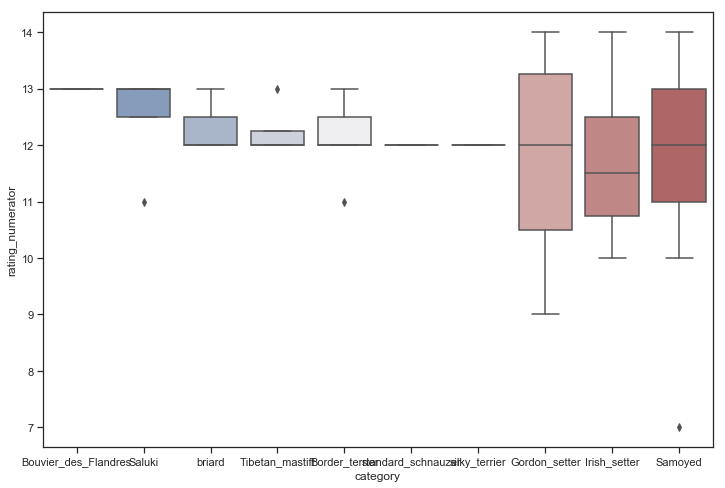

In [235]:
#用seaborn画箱型图
category_10['rating_numerator'] = category_10['rating_numerator'].astype(float)
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="category", y="rating_numerator", data=category_10,
            palette = 'vlag')
plt.savefig('boxplot.jpg')

##### 由上图可以知道，从均值来说,法兰德斯牧牛狗（Bouvier des Flandres)评分最高，但是其数量只有一个，因此不具有太大参考价值

#### 2）点赞数、转发数与评分是否相关？  

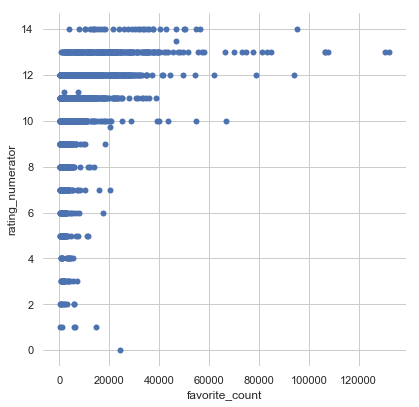

In [236]:
#点赞数与评分的相关关系
sns.set(style="whitegrid")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="favorite_count", y="rating_numerator",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_clean, ax=ax);
plt.savefig('favo_nume.jpg')

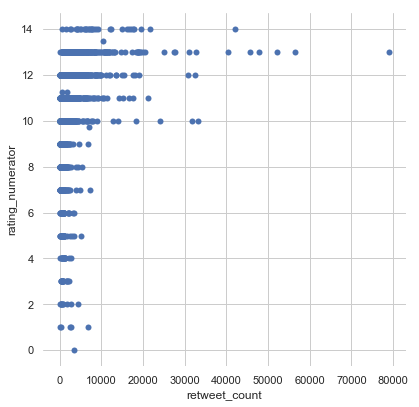

In [237]:
#转发数与评分的相关关系
sns.set(style="whitegrid")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="retweet_count", y="rating_numerator",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_clean, ax=ax);
plt.savefig('retweet_nume.jpg')

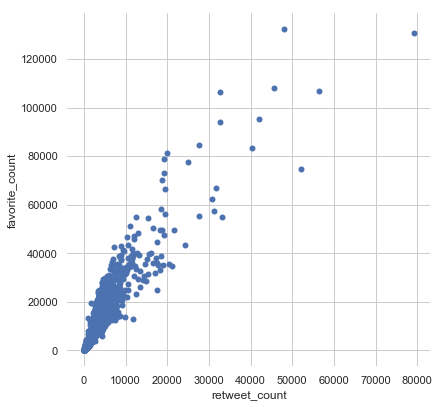

In [238]:
# #转发数与点赞数的相关关系
sns.set(style="whitegrid")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="retweet_count", y="favorite_count",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_clean, ax=ax);
plt.savefig('favo_retweet.jpg')

由上面三个图可以知道：点赞数、转发数基本独立于狗的评分系统；而点赞数和转发数有很强的正相关关系，点赞越多，转发越多。

3）哪只狗有最高的点赞数？哪只狗有最高的转发数？

In [239]:
most_favorite_index = df_clean['favorite_count'].sort_values(ascending = False).index[0]
most_retweet_index = df_clean['retweet_count'].sort_values(ascending = False).index[0]

In [240]:
df_clean[df_clean.index == most_favorite_index]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,category
306,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,nan,nan,NaT,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,47958,132318,Lakeland_terrier


In [241]:
df_clean[df_clean.index == most_retweet_index]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,category
768,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,nan,nan,NaT,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,...,True,ice_bear,0.044681,False,whippet,0.018442,True,79116,130533,Labrador_retriever
